Input series shape: (1, 1000)
Teacher series shape: (1, 1000)
=== Weight Initialization Test ===
Reservoir adjacency matrix initialized. Beginning spectral radius scaling.
The largest eigenvalue of this matrix was: 4.248286293593137
Reservoir spectral radius scaled to: 0.8999999999952311
Reservoir weights spectral radius scaling completed.


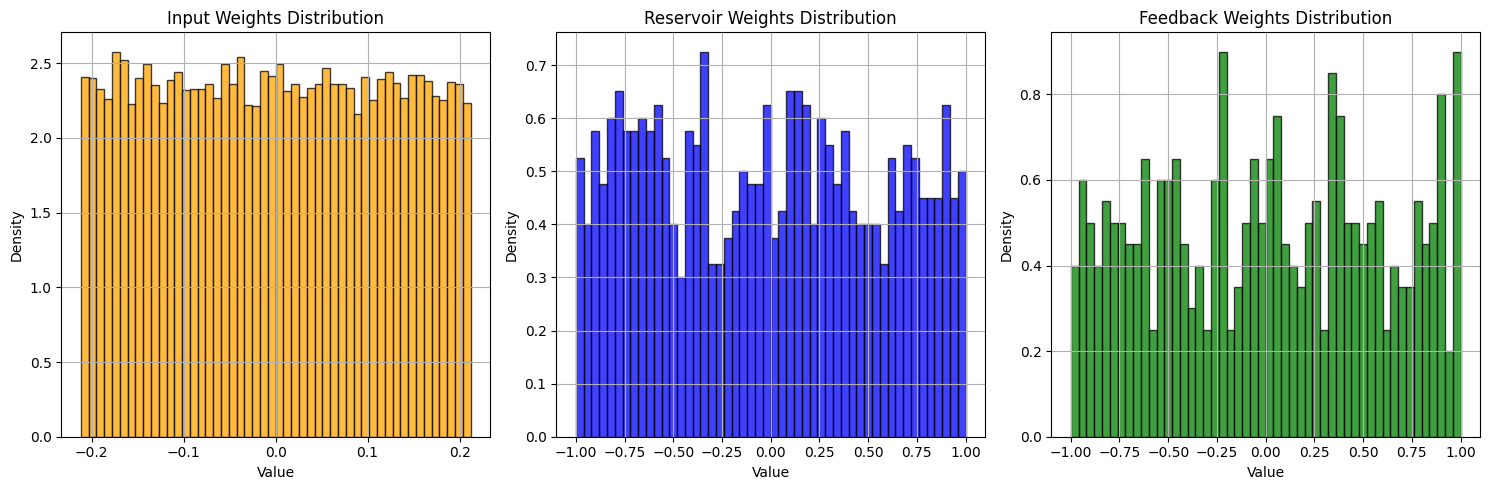


=== Matrix Shapes ===
Matrix         Shape               
-----------------------------------
W_res          (500, 500)          
W_in           (500, 2)            
W_fb           (500, 1)            
Reservoir Adjacency Matrix is of type <class 'scipy.sparse._csr.csr_matrix'> with shape (500, 500)
Network matrices uploaded to /home/dafydd/PycharmProjects/py-ESN-software-testing/Generated_Weights
Weight initialization test passed.

=== State Acquisition Test ===
Scaled inputs shape: (1, 1000)
Scaled inputs shape with bias: (2, 1000)
Bias column shape: (1, 1)


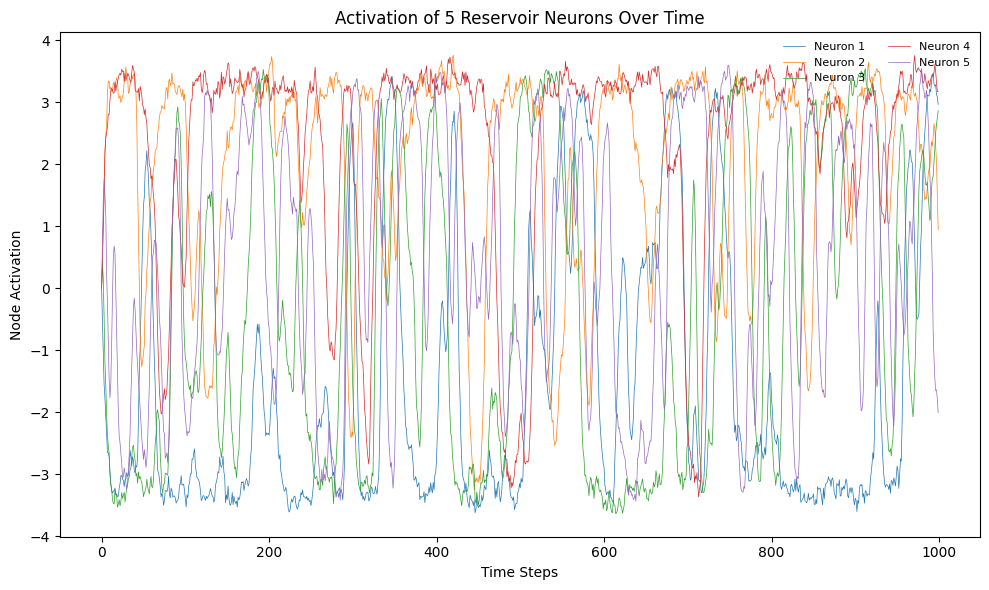

State acquisition test passed.

=== XX^T and YX^T Updates Test ===
Matrix updates test passed.

=== Noise Injection Test ===
Previous state shape: (500, 1)
Input pattern shape: (1, 1)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 1 is different from 2)

In [3]:
import numpy as np
from ESN_class_main import EchoStateNetwork

# Test Parameters
ESN_params = {
    "input_dim": 1,  # Number of inputs
    "nodes": 500,  # Reservoir size
    "output_dim": 1,  # Number of outputs
    "ridge": 0.1,  # Ridge penalty
    "leak": 0.3,  # Leaking rate
    "connectivity": 0.1,  # Reservoir sparsity
    "input_scaling": np.array([1.0]),  # Scaling for each input feature
    "spectral_radius": 0.9,  # Desired spectral radius
    "enable_feedback": True,  # Enable or disable feedback
    "teacher_scaling": np.array([0.8]),  # Scaling for feedback
    "bias": True,  # Include bias
    "seed": 42,  # Random seed
    "noise": 0.01
}
timesteps = 1000
input_series = np.sin(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
print(f"Input series shape: {input_series.shape}")
teacher_series = 0.5 * np.cos(np.linspace(0, 10 * np.pi, timesteps)).reshape(1, -1)
print(f"Teacher series shape: {teacher_series.shape}")

# Create ESN Instance
esn = EchoStateNetwork(ESN_params, verbose=3)

# Test Weight Initialization
print("=== Weight Initialization Test ===")
esn.initialize_reservoir(distribution="uniform")
assert esn.W_res.shape == (ESN_params["nodes"], ESN_params["nodes"]), "Incorrect reservoir matrix shape"
assert esn.W_in.shape == (ESN_params["nodes"], ESN_params["input_dim"] + ESN_params["bias"]), "Incorrect input matrix shape"
if ESN_params["enable_feedback"]:
    assert esn.W_fb.shape == (ESN_params["nodes"], ESN_params["output_dim"]), "Incorrect feedback matrix shape"
print("Weight initialization test passed.\n")

# Test State Acquisition
print("=== State Acquisition Test ===")
states = esn.acquire_reservoir_states(input_series, teachers=teacher_series, visualized_neurons=5)
assert states.shape == (ESN_params["nodes"], timesteps), "Incorrect state matrix shape"
print("State acquisition test passed.\n")

# Test XX^T and YX^T Updates
print("=== XX^T and YX^T Updates Test ===")
expected_dim = 1 + ESN_params["input_dim"] + ESN_params["nodes"]  # Bias + Inputs + Nodes
assert esn.XX_T.shape == (expected_dim, expected_dim), "Incorrect XX^T matrix shape"
assert esn.YX_T.shape == (ESN_params["output_dim"], expected_dim), "Incorrect YX^T matrix shape"
print("Matrix updates test passed.\n")

# Test Noise Injection
print("=== Noise Injection Test ===")
noisy_states = esn._update_no_feedback(states[:, 0:1], input_series[:, 0:1])  # Single update
assert noisy_states.shape == (ESN_params["nodes"],), "Incorrect noisy state shape"
print("Noise injection test passed.\n")

# Final State Check
print("=== Final State Check ===")
print("Reservoir states shape:", states.shape)
print("XX^T shape:", esn.XX_T.shape)
print("YX^T shape:", esn.YX_T.shape)